In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [111]:
alpha = 3.5
N_inf = 8500
k = 0.03

In [152]:
1+2/alpha

1.5714285714285714

### Построение графиков решений при разных k

In [120]:
def get_f(_k, _a):
    def f(N, t):
        return _k*N*(1-(N/N_inf)**_a)
    return f

In [126]:
n = 100
t_end = 20
t_eval = np.linspace(0, t_end, n+1)

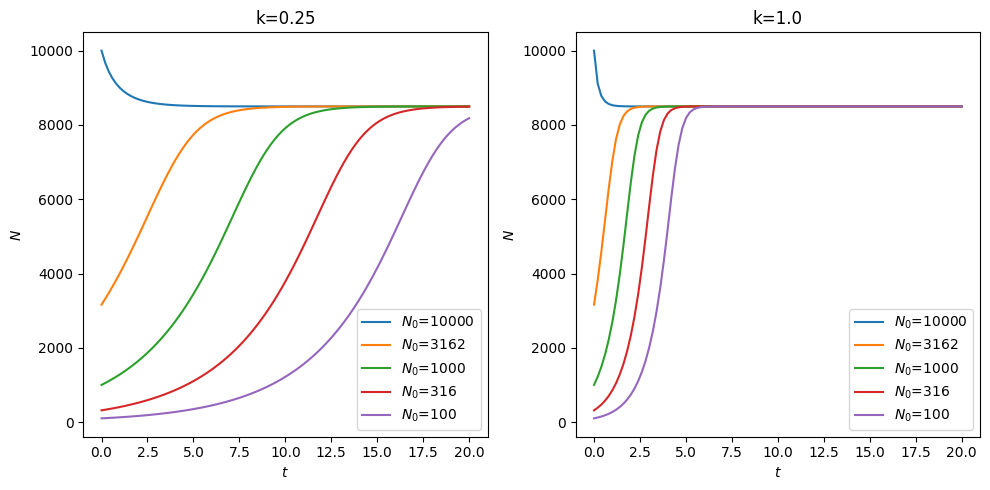

In [153]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=True)
for i, cur_k in enumerate([0.25, 1.00]):
    rhs = get_f(cur_k, alpha)
    N_0 = sorted(np.round(np.logspace(2,4,5)), reverse=True)
    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_title(f'k={cur_k}')
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend()
fig.tight_layout()
plt.show()

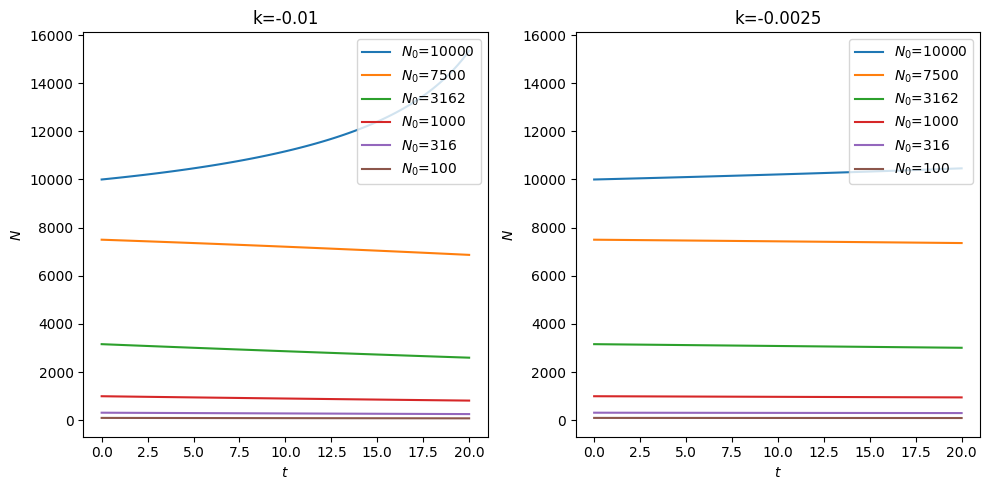

In [154]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=True)
for i, cur_k in enumerate([-0.01, -0.0025]):
    rhs = get_f(cur_k, alpha)
    N_0 = np.round(np.logspace(2,4,5))
    N_0 = sorted(np.append(N_0, 7500), reverse=True)
    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_title(f'k={cur_k}')
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend(loc='upper right')
fig.tight_layout()
plt.show()

### Построение бифуркационной диаграммы

In [6]:
r_lim = ((alpha + 1) ** (1./alpha + 1))/alpha

In [4]:
def logistic(r, x):
    y = r * x * (1 - x ** alpha)
    if isinstance(y, np.ndarray):
        y[y < 0] = 0.
    else:
        y = max(y, 0.)
    return y

In [5]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
#                                sharey=True)
# plot_system(2, .1, 10, ax=ax1)

In [7]:
n = 10000
r = np.linspace(0.1, r_lim, n)
iterations = 5000
last = 200
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
one_step = x

In [8]:
last_x = np.ones((last,n))

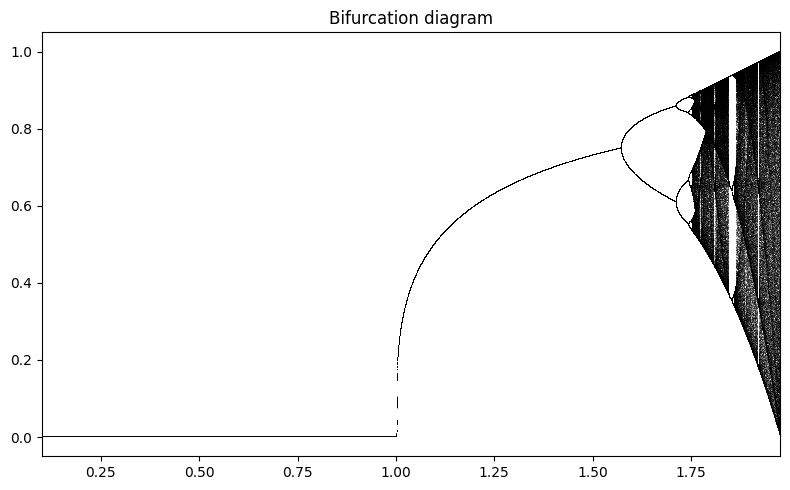

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step = x
    x = logistic(r, x)
    # if i == 0:
    #     one_step = x
    lyapunov += np.log(abs(r - (alpha + 1) * r * x ** alpha))
    if i >= (iterations - last):
        last_x[last + i - iterations] = x
        ax1.plot(r, x, ',k', alpha=.25)

ax1.set_xlim(0.1, r_lim)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()
plt.show()

### Поиск точек бифуркаций

In [12]:
cycle_len = 1
cycle_arr = np.ones(n)
last_i = n-1
bif_idx = [] # индексы точек бифуркаций в массиве значений параметра
bif_dots = [] # значения точек бифуркаций
r_cnt = 0
for i in range(n):
    _x = last_x[:,i]
    _x_shift = _x[cycle_len:]
    _x_shift_2 = _x[cycle_len*2:]
    if (not (np.abs(_x[:-cycle_len] - _x_shift) < 0.0001).all()) and (np.abs(_x[:-cycle_len*2] - _x_shift_2) < 0.0001).all():
        cycle_len *= 2
        bif_idx.append(i)
        bif_dots.append(r[i])
        r_cnt += 1
        print(f'r[{r_cnt}]={r[i]}')
    cycle_arr[i] = cycle_len
    if cycle_len*2 > last:
        last_i = i
        break

r[1]=1.5712694908431186
r[2]=1.7110419686138563
r[3]=1.7429363595145615
r[4]=1.749878079887068
r[5]=1.7513789924000422
r[6]=1.751566606464164


In [13]:
last_i

9999

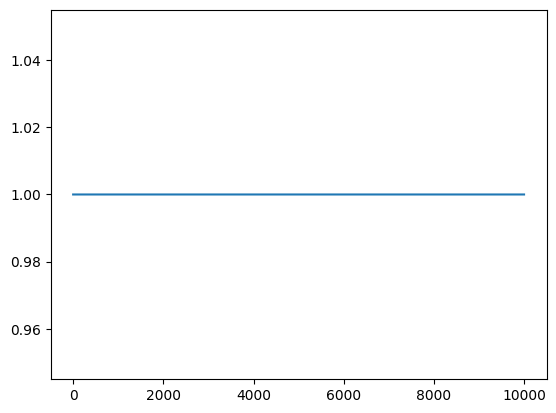

In [79]:
plt.plot(cycle_arr[:last_i])
plt.show()

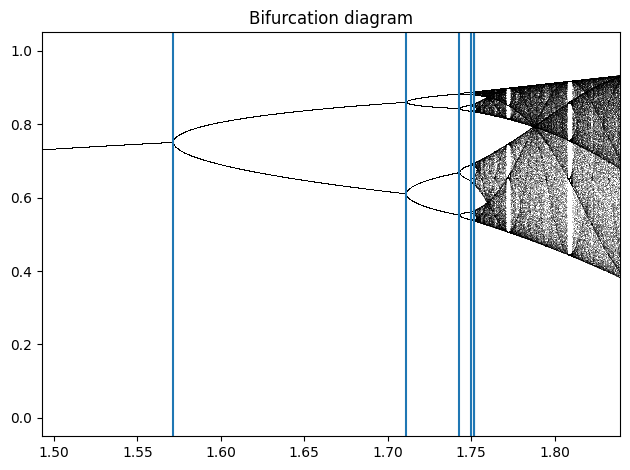

In [15]:
for i in range(0, last):
    plt.plot(r, last_x[i], ',k', alpha=.25)
for r_val in bif_dots:
    plt.axvline(x=r_val)
plt.xlim(bif_dots[0]*0.95, bif_dots[-1]*1.05)
plt.title("Bifurcation diagram")
plt.tight_layout()
plt.show()

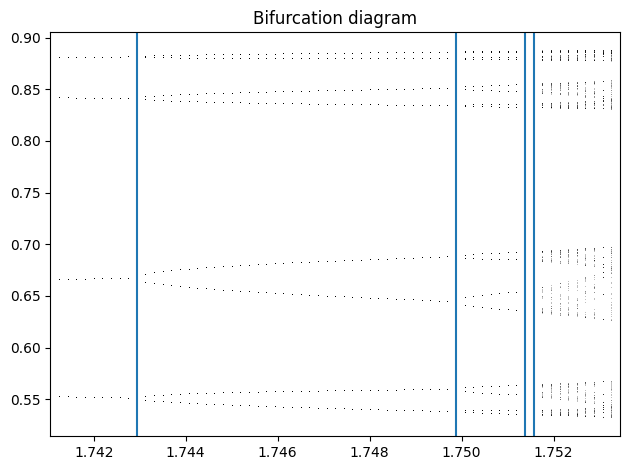

In [15]:
for i in range(0, last):
    plt.plot(r[bif_idx[2]-10:bif_idx[-1]+10], last_x[i, bif_idx[2]-10:bif_idx[-1]+10], ',k', alpha=.25)

for r_val in bif_dots:
    plt.axvline(x=r_val)

plt.xlim(r[bif_idx[2]-10], r[bif_idx[-1]+10])
plt.title("Bifurcation diagram")

plt.tight_layout()
plt.show()

Последние точки бифуркации очень сложно различить, поэтому следует отыскать их отдельно с большой точностью.

In [17]:
eps = 0.01

In [18]:
n = 10000
# рассматриваем промежотук от 3ей точки бифуркации до последней
r_br = np.linspace(r[bif_idx[2]-20], r[bif_idx[-1]+20], n)
iterations = 1000
last = 100
x_br = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
one_step_br = x_br

In [19]:
last_x_br = np.ones((last,n))

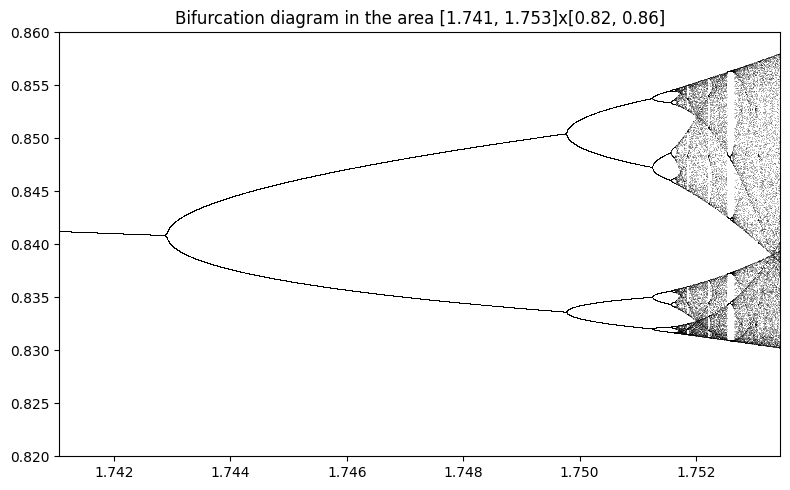

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step_br = x_br
    x_br = logistic(r_br, x_br)
    # if i == 0:
    #     one_step_br = x_br
    lyapunov += np.log(abs(r_br - (alpha + 1) * r_br * x_br ** alpha))
    if i >= (iterations - last):
        ax1.plot(r_br, x_br, ',k', alpha=.25)
        last_x_br[last + i - iterations] = x_br
ax1.set_ylim(0.82, 0.86)
ax1.set_xlim(r[bif_idx[2]-10], r[bif_idx[-1]+10])
ax1.set_title('Bifurcation diagram in the area [{:.3f}, {:.3f}]x[0.82, 0.86]'.format(r[bif_idx[2]-10], r[bif_idx[-1]+10]))

plt.tight_layout()

In [26]:
cycle_len = 4
cycle_arr = np.ones(n)
last_i_br = n-1
bif_idx_br = []
bif_dots_br = []
r_cnt_br = 2
for i in range(n):
    _x = last_x_br[:,i]
    _x_shift = _x[cycle_len:]
    _x_shift_2 = _x[cycle_len*2:]
    if (not (np.abs(_x[:-cycle_len] - _x_shift) < 0.0001).all()) and (np.abs(_x[:-cycle_len*2] - _x_shift_2) < 0.0001).all():
        cycle_len *= 2
        bif_idx_br.append(i)
        bif_dots_br.append(r_br[i])
        r_cnt_br += 1
        print(f'r[{r_cnt_br}]={r_br[i]}')
    cycle_arr[i] = cycle_len
    if cycle_len*2 > last:
        last_i_br = i
        break

r[3]=1.7428696372811363
r[4]=1.7497615036114014
r[5]=1.7512444408995105
r[6]=1.751563942078015


In [27]:
print('Длина последнего цикла: ', cycle_len)

Длина последнего цикла:  64


In [28]:
bif_dots_br

[1.7428696372811363, 1.7497615036114014, 1.7512444408995105, 1.751563942078015]

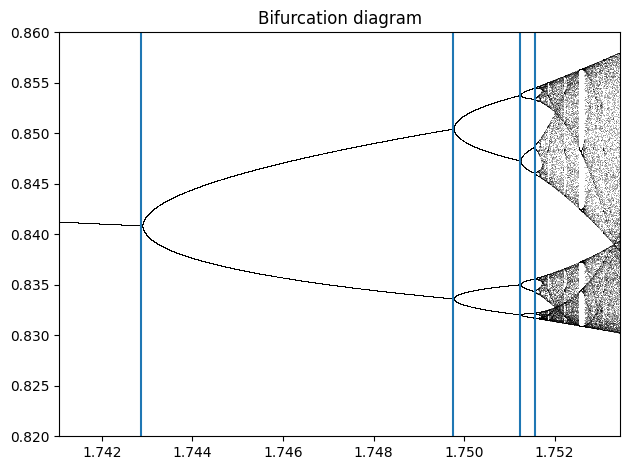

In [29]:
for i in range(0, last):
    plt.plot(r_br, last_x_br[i], ',k', alpha=.25)

for r_val in bif_dots_br:
    plt.axvline(x=r_val)

plt.ylim(0.82, 0.86)
plt.xlim(r[bif_idx[2]-10], r[bif_idx[-1]+10])
plt.title("Bifurcation diagram")

plt.tight_layout()
plt.show()

In [30]:
print(bif_dots)
print(bif_dots_br)

[1.5712694908431186, 1.7110419686138563, 1.7429363595145615, 1.749878079887068, 1.7513789924000422, 1.751566606464164]
[1.7428696372811363, 1.7497615036114014, 1.7512444408995105, 1.751563942078015]


In [31]:
bif_dots[2:] = bif_dots_br
# (bif_dots_br[-2] - bif_dots_br[-3])/(bif_dots_br[-1] - bif_dots_br[-2])

In [35]:
print('Приближения к числу Фейгенбаума:')
for i in range(3):
    print(f'б[{i+1}]={(C[i+1] - bif_dots[i])/(bif_dots[i+2] - bif_dots[i+1])}')

Приближения к числу Фейгенбаума:
б[1]=4.391539928101258
б[2]=4.618149444876994
б[3]=4.6474428726873995


### Приближение биф-ной диаграммы в окрестности точки биф-ции

См. maple-файл `lab1.mw`. Приближения получены в нём.

$3.5 = 7/2$

$1/3.5 = 2/7$

$x^{1/3.5} = {}^7\sqrt{x^2}$

In [85]:
def x_1(r):
    return ((-(-5.*r**2+13.*r-6.285714286+0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)

def x_2(r):
    return ((-(-5.*r**2+13.*r-6.285714286-0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)

In [97]:
_r_range = np.linspace(bif_dots[0],bif_dots[1],100)

C:\Users\Ravil\AppData\Local\Temp\ipykernel_10004\1017765910.py:2: RuntimeWarning: invalid value encountered in sqrt
  return ((-(-5.*r**2+13.*r-6.285714286+0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)
C:\Users\Ravil\AppData\Local\Temp\ipykernel_10004\1017765910.py:5: RuntimeWarning: invalid value encountered in sqrt
  return ((-(-5.*r**2+13.*r-6.285714286-0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)


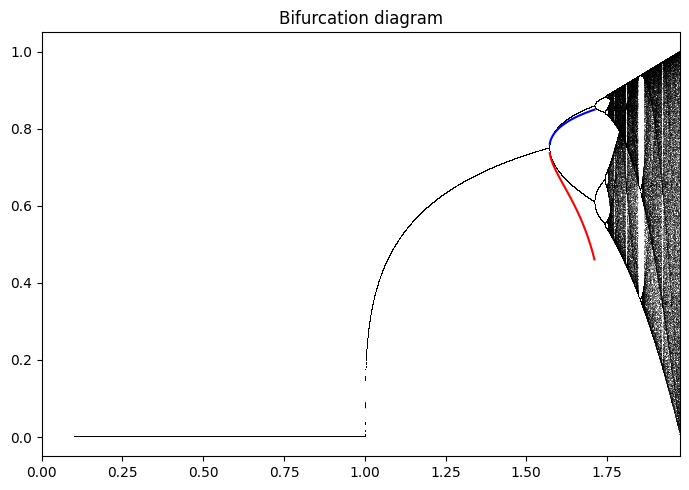

In [108]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
for i in range(iterations):
    if i >= (iterations - last):
        ax1.plot(r, last_x[last + i - iterations], ',k', alpha=.25)

ax1.set_xlim(0.0, r_lim)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

plt.plot(_r_range,x_1(_r_range),'b-')
plt.plot(_r_range,x_2(_r_range),'r-')
plt.show()

C:\Users\Ravil\AppData\Local\Temp\ipykernel_10004\1017765910.py:2: RuntimeWarning: invalid value encountered in sqrt
  return ((-(-5.*r**2+13.*r-6.285714286+0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)
C:\Users\Ravil\AppData\Local\Temp\ipykernel_10004\1017765910.py:5: RuntimeWarning: invalid value encountered in sqrt
  return ((-(-5.*r**2+13.*r-6.285714286-0.4761904762e-1*np.sqrt(-1911.*r**2+9702.*r-10527.))/((5.*r-11.)*r))**2)**(1./7)


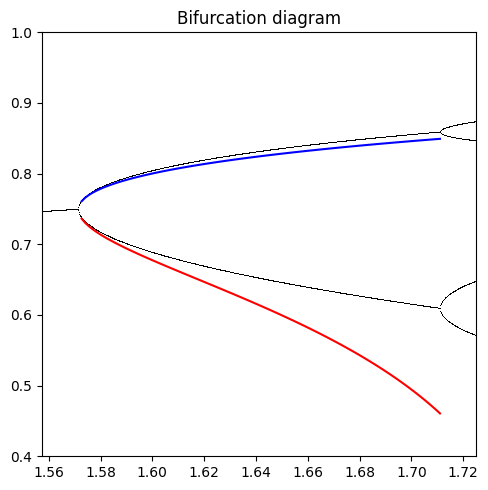

In [109]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
for i in range(iterations):
    if i >= (iterations - last):
        ax1.plot(r, last_x[last + i - iterations], ',k', alpha=.25)

xwid = (bif_dots[1]-bif_dots[0])
ax1.set_xlim(bif_dots[0]-0.1*xwid, bif_dots[1]+0.1*xwid)
ax1.set_ylim(0.4, 1.0)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

plt.plot(_r_range,x_1(_r_range),'b-')
plt.plot(_r_range,x_2(_r_range),'r-')
plt.show()

### Тройной цикл

На диаграмме выше можно заметить, что тройной цикл находится в интервале (1.84, 1.86)

In [44]:
n = 10000
r_tr = np.linspace(1.84, 1.855, n)
iterations = 1000
last = 100
x_tr = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
one_step_tr = x_tr

In [45]:
last_x_tr = np.ones((last,n))

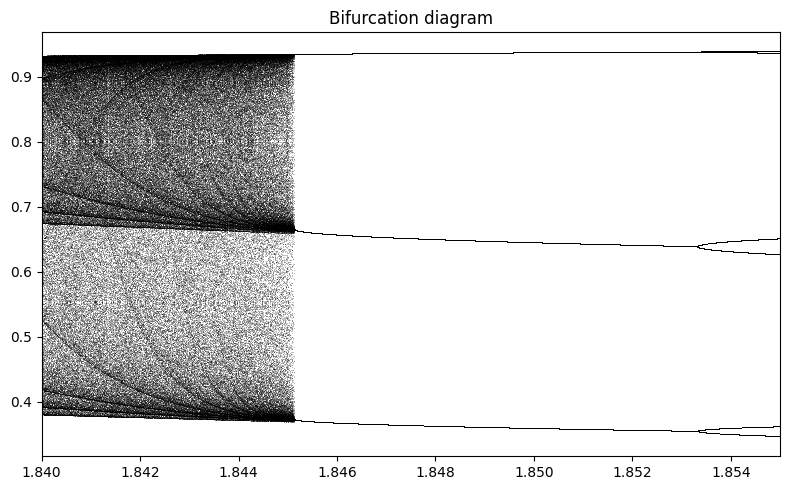

In [77]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step_tr = x_tr
    x_tr = logistic(r_tr, x_tr)
    # if i == 0:
    #     one_step_br = x_br
    lyapunov += np.log(abs(r_tr - (alpha + 1) * r_tr * x_tr ** alpha))
    if i >= (iterations - last):
        ax1.plot(r_tr, x_tr, ',k', alpha=.25)
        last_x_tr[last + i - iterations] = x_tr
# ax1.set_ylim(0.82, 0.86)
ax1.set_xlim(1.84, 1.855)
ax1.set_title("Bifurcation diagram")

plt.tight_layout()

Найдём точное значение точку, при которой возникает тройной цикл

In [73]:
cycle_arr = np.ones(n)
tri_circ_idx = None
tri_circ = None

for i in range(n):
    # print(r_tr[i])
    _x = last_x_tr[:,i]
    _x_shift_1 = _x[1:]
    _x_shift_3 = _x[3:]
    if (not (np.abs(_x[:-1] - _x_shift_1) < 0.0001).all()) and (np.abs(_x[:-3] - _x_shift_3) < 0.0001).all():
        tri_circ_idx = i
        tri_circ = r_tr[i]
        print(f'tricirc_point = {r_tr[i]}')
        break

tricirc_point = 1.845136513651365


In [74]:
tri_circ_idx

3424

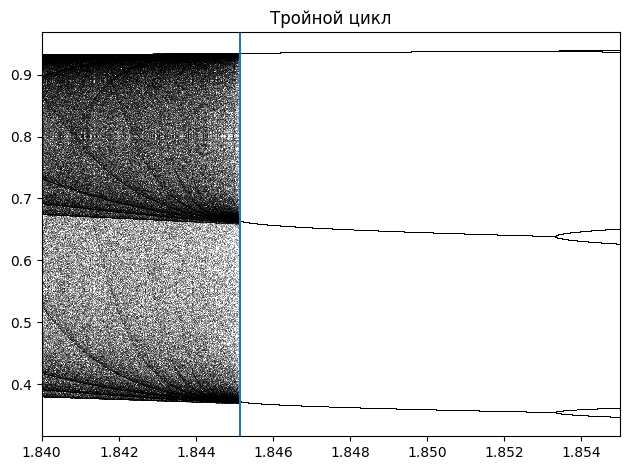

In [80]:
for i in range(0, last):
    plt.plot(r_tr, last_x_tr[i], ',k', alpha=.25)

plt.axvline(x=tri_circ)

plt.xlim(1.84, 1.855)
plt.title("Тройной цикл")

plt.tight_layout()
plt.show()